In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_store = pd.read_csv("data/googleplaystore.csv")
df = df_store.copy()

In [65]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [66]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [67]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### Look for outliers

In [68]:
df_store.duplicated().sum()

483

In [69]:
df_store.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

- Remove duplicate and nan rows

In [70]:
# Dropping missing values
df_store.dropna(inplace=True)

In [71]:
# Dropping duplicate values
df_store.drop_duplicates(inplace=True)

- Check our results

In [72]:
df_store.duplicated().sum()

0

In [73]:
df_store.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

- Looks good, we got rid of our duplicate and nan rows

#### Change any data types if we need to or 

In [74]:
df_store['Installs'] = df_store['Installs'].str.replace('+', '')
df_store['Installs'] = df_store['Installs'].str.replace(',', '')

In [75]:
df_store['Installs'] = df_store['Installs'].astype(int)

In [76]:
# Change data type of reviews column
df_store['Reviews'] = df_store['Reviews'].astype(int)

In [77]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [78]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 971.9+ KB


/tmp/ipykernel_32105/1888069350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_store, x='Category', palette="hls")


Text(0.5, 1.0, 'Distibution of App Categories')

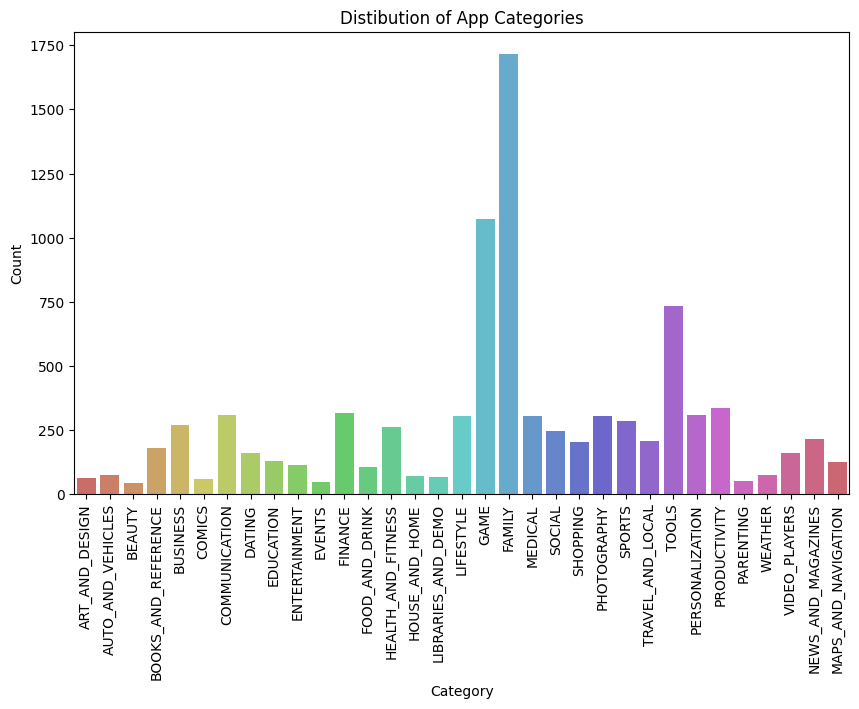

In [79]:
# Bar plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_store, x='Category', palette="hls")
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distibution of App Categories')

Text(0.5, 1.0, 'Relationship between Reviews and Rating')

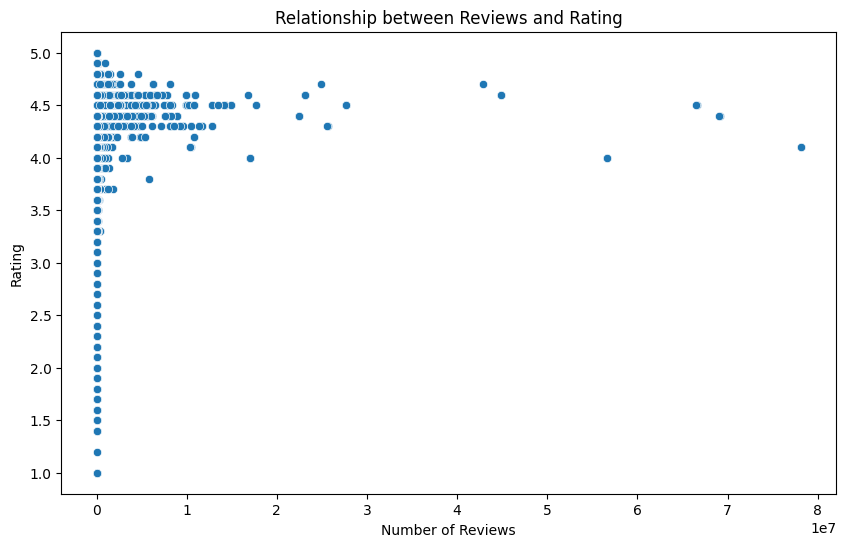

In [80]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_store, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

Text(0.5, 1.0, 'Relationship between Category and Installs')

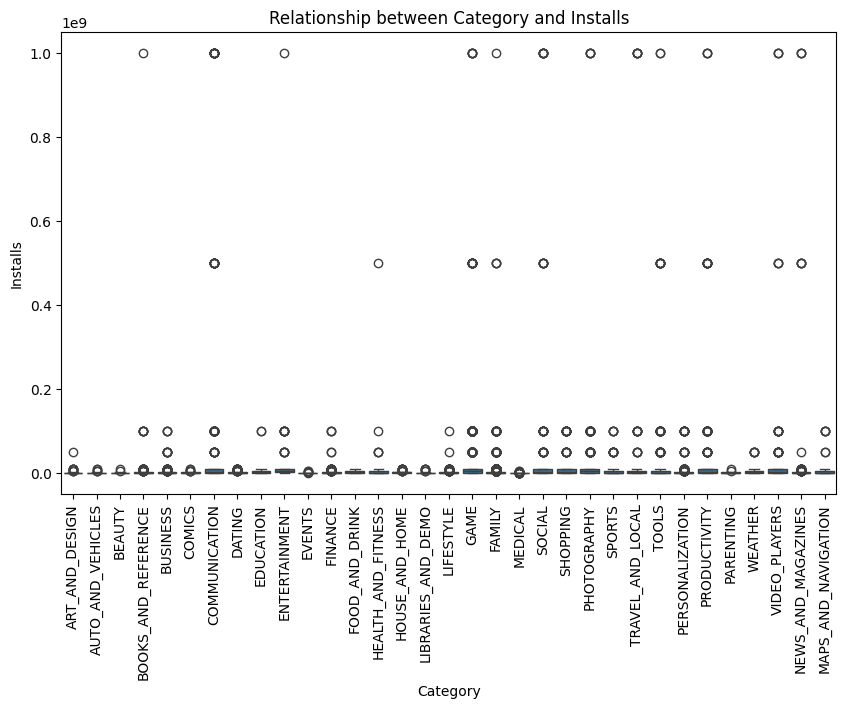

In [81]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.title('Relationship between Category and Installs')

In [82]:
from scipy.stats import ttest_ind # Splitting the dataset into free and paid apps
free_apps = df_store[df_store['Type'] == 'Free']
paid_apps = df_store[df_store['Type'] == 'Paid']

In [83]:
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

In [84]:
p_value

0.0002984015230732988

In [87]:
t_stat

-3.618117285576091

In [85]:
# Checking p_value
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in ratings.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ratings.")

Reject null hypothesis: There is a significant difference in ratings.


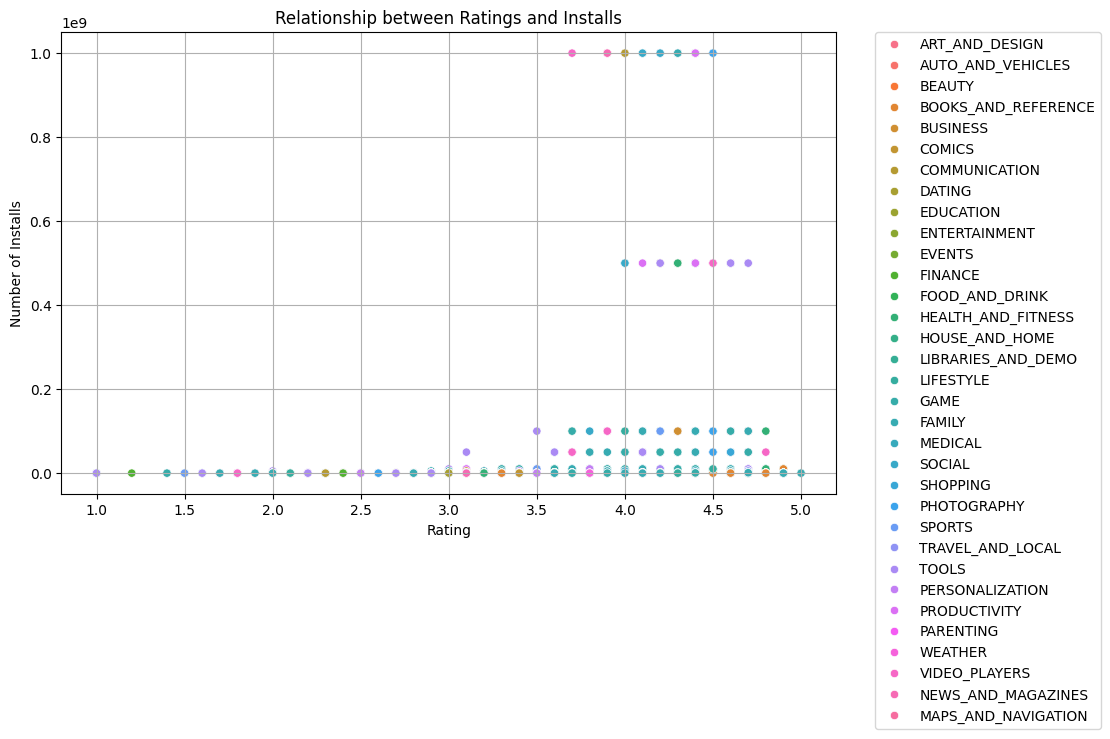

In [91]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_store, x='Rating', y='Installs', hue='Category')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'Average Rating Trend over Time')

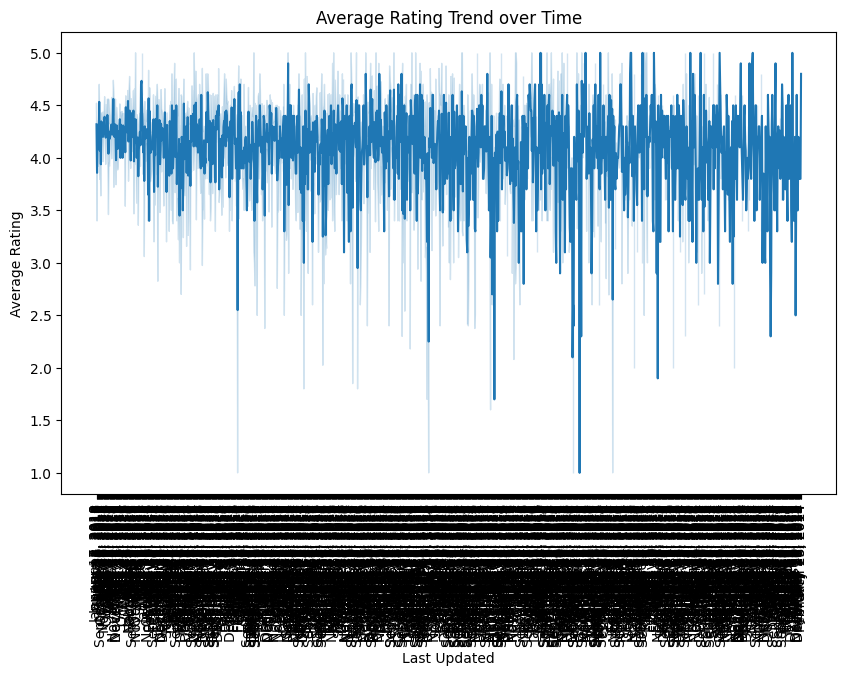

In [92]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store, x='Last Updated', y='Rating')
plt.xlabel('Last Updated')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')

In [93]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [95]:
# Convert 'Last Updated' to datetime
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

# Set 'last Updated' as the index
df_store.set_index('Last Updated', inplace=True)

# Resample 'rating' to monthly frequency
df_store_monthly = df_store['Rating'].resample('M').mean()

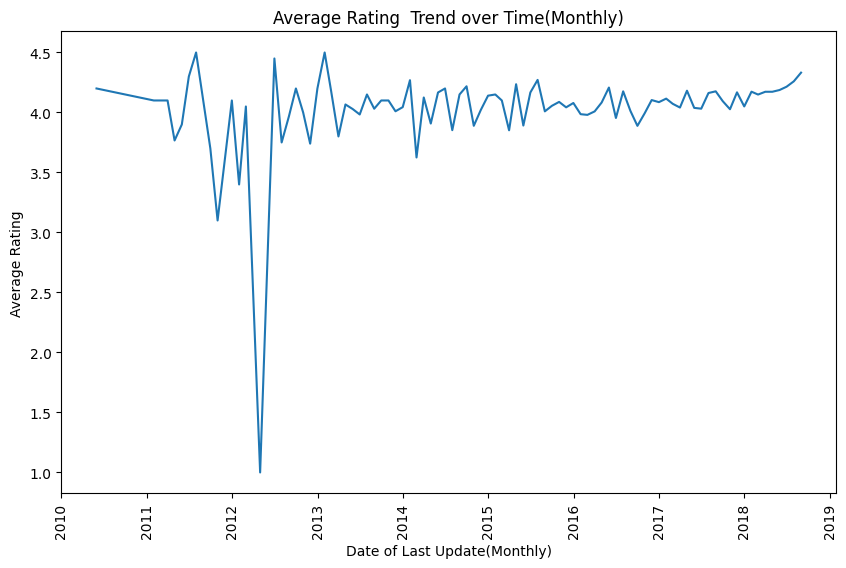

In [96]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store_monthly)
plt.xlabel('Date of Last Update(Monthly)')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating  Trend over Time(Monthly)')
plt.show()